<a href="https://colab.research.google.com/github/toluwee/Customer-Churn/blob/main/Predict_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Customer Churn in Python

## Objective

The objective of this project is to conduct an exploratory data analysis of the customer data of a telecommunication company. The analysis is done with a view to create a machine learning model that can adequately predict customer churn. Insights from the analysis can be inform the company on winning startegies for retention of high value customers 

## Import libraries and modules

In [ ]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

## Importing Data

In [ ]:
filep'https://datasciencefiles.s3.us-east-2.amazonaws.com/Churn.csv'
telco = pd.read_csv('churn.csv')


FileNotFoundError: ignored

## Exploring Data

In [ ]:
telco.head()

In [ ]:
telco.info()

### Summary statistics for both classes

In [ ]:
telco.groupby(['Churn']).mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


Churners are observed to make more calls generally than non-churners. The more they use the services, the higher the chances of seeing something they don't like.

In [ ]:
telco.groupby(['Churn']).std()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,39.88235,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
yes,39.46782,11.860138,68.997792,51.728910,47.132825,2.793190,1.853275,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270


### Churn by State

Next we explore the churn ratio per state

In [ ]:
telco.groupby('State')['Churn'].value_counts()

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
       yes      11
AZ     no       60
       yes       4
CA     no       25
       yes       9
CO     no       57
       yes       9
CT     no       62
       yes      12
DC     no       49
       yes       5
DE     no       52
       yes       9
FL     no       55
       yes       8
GA     no       46
       yes       8
HI     no       50
       yes       3
IA     no       41
       yes       3
ID     no       64
       yes       9
IL     no       53
       yes       5
IN     no       62
       yes       9
KS     no       57
       yes      13
KY     no       51
       yes       8
LA     no       47
       yes       4
MA     no       54
       yes      11
MD     no       53
       yes      17
ME     no       49
       yes      13
MI     no       57
       yes      16
MN     no       69
       yes      15
MO     no       56
       yes       7
MS     no       51
       yes      14

### Exploring feature distributions

<AxesSubplot:xlabel='Day_Mins'>

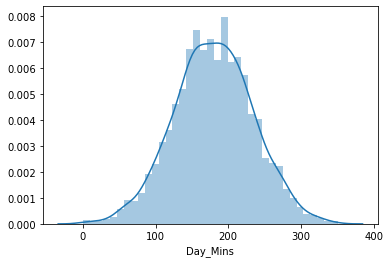

In [ ]:
# Visualize the distribution of 'Day_Mins'
sns.distplot(telco['Day_Mins'])

<AxesSubplot:xlabel='Eve_Mins'>

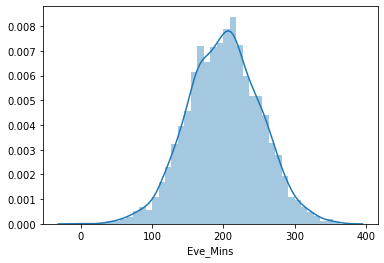

In [ ]:
# Visualize the distribution of 'Eve_Mins'
sns.distplot(telco['Eve_Mins'])

<AxesSubplot:xlabel='Night_Mins'>

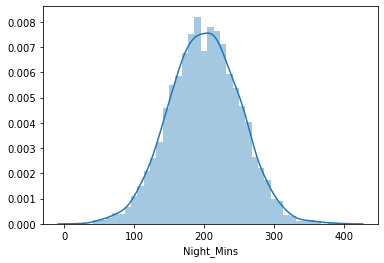

In [ ]:
# Visualize the distribution of 'Night_Mins'
sns.distplot(telco['Night_Mins'])

<AxesSubplot:xlabel='Intl_Mins'>

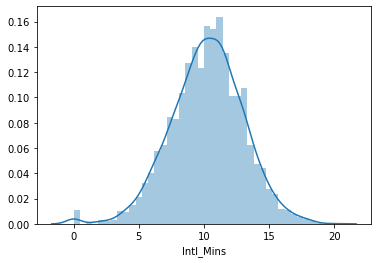

In [ ]:
# Visualize the distribution of 'Intl_Mins'
sns.distplot(telco['Intl_Mins'])

### Customer service calls and churn

<AxesSubplot:xlabel='Churn', ylabel='CustServ_Calls'>

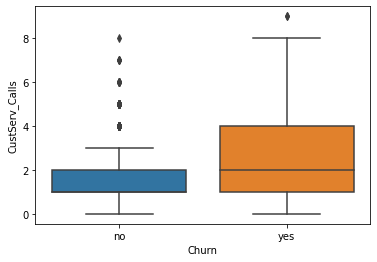

In [ ]:
# Create the box plot
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          data = telco)

<AxesSubplot:xlabel='Churn', ylabel='CustServ_Calls'>

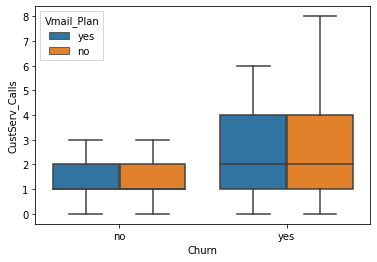

In [ ]:
# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan")

<AxesSubplot:xlabel='Churn', ylabel='CustServ_Calls'>

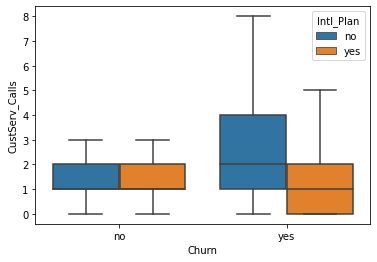

In [ ]:
# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")


## Preprocessing for Churn Modeling

### Encoding binary features

In [ ]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].map({"no":0, "yes":1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].map({"no":0, "yes":1})

# Replace 'no' with 0 and 'yes' with 1 in 'Intl_Plan'
telco['Intl_Plan'] = telco['Intl_Plan'].map({"no":0, "yes":1})

# telco['Vmail_Plan'] = np.where(telco['Vmail_Plan'].str.contains("yes"), 1, other=0)

# telco['Churn'] = np.where(telco['Churn'].str.contains("yes"), 1, other=0)

# telco['Intl_Plan'] = np.where(telco['Intl_Plan'].str.contains("yes"), 1, other=0)



telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


### Dropping unnecessary features

In [ ]:
#telco = telco.drop(['Phone', 'Area_Code'], axis=1)

### One hot encoding

In [ ]:
telco = pd.get_dummies(telco, drop_first=True)
telco.tail()

Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  \
3328             192             36     156.2     215.5       279.1   
3329              68              0     231.1     153.4       191.3   
3330              28              0     180.8     288.8       191.9   
3331             184              0     213.8     159.6       139.2   
3332              74             25     234.4     265.9       241.4   

      Intl_Mins  CustServ_Calls  Churn  Intl_Plan  Vmail_Plan  Day_Calls  \
3328        9.9               2      0          0           1         77   
3329        9.6               3      0          0           0         57   
3330       14.1               2      0          0           0        109   
3331        5.0               2      0          1           0        105   
3332       13.7               0      0          0           1        113   

      Day_Charge  Eve_Calls  Eve_Charge  Night_Calls  Night_Charge  \
3328       26.55        126       18.32           83         12.56   
3329       39.29         55       13.04          123          8.61   
3330       30.74         58       24.55           91          8.64   
3331       36.35         84       13.57          137          6.26   
3332       39.85         82       22.60           77         10.86   

      Intl_Calls  Intl_Charge  Area_Code  State_AL  State_AR  State_AZ  \
3328           6         2.67        415         0         0         1   
3329           4         2.59        415         0         0         0   
3330           6         3.81        510         0         0         0   
3331          10         1.35        510         0         0         0   
3332           4         3.70        415         0         0         0   

      State_CA  State_CO  State_CT  State_DC  State_DE  State_FL  State_GA  \
3328         0         0         0         0         0         0         0   
3329         0         0         0         0         0         0         0   
3330         0         0         0         0         0         0         0   
3331         0         0         1         0         0         0         0   
3332         0         0         0         0         0         0         0   

      State_HI  State_IA  State_ID  State_IL  State_IN  State_KS  State_KY  \
3328         0         0         0         0         0         0         0   
3329         0         0         0         0         0         0         0   
3330         0         0         0         0         0         0         0   
3331         0         0         0         0         0         0         0   
3332         0         0         0         0         0         0         0   

      State_LA  State_MA  State_MD  State_ME  State_MI  State_MN  State_MO  \
3328         0         0         0         0         0         0         0   
3329         0         0         0         0         0         0         0   
3330         0         0         0         0         0         0         0   
3331         0         0         0         0         0         0         0   
3332         0         0         0         0         0         0         0   

      State_MS  State_MT  State_NC  State_ND  State_NE  State_NH  State_NJ  \
3328         0         0         0         0         0         0         0   
3329         0         0         0         0         0         0         0   
3330         0         0         0         0         0         0         0   
3331         0         0         0         0         0         0         0   
3332         0         0         0         0         0         0         0   

      State_NM  State_NV  State_NY  State_OH  State_OK  State_OR  State_PA  \
3328         0         0         0         0         0         0         0   
3329         0         0         0         0         0         0         0   
3330         0         0         0         0         0         0         0   
3331         0         0         0         0         0         0    

### Feature scaling

In [ ]:
# Create target variable
y = telco['Churn']

In [ ]:
num_features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']

In [ ]:
# Create feature variable
telco_num_features = telco.drop('Churn', axis=1)[num_features]

# Scale telco using StandardScaler
num_features_scaled = StandardScaler().fit_transform(telco_num_features)

# Add column names back for readability
num_features_scaled_df = pd.DataFrame(num_features_scaled, columns=telco_num_features.columns)

X = pd.concat([num_features_scaled_df, telco[['Vmail_Plan', 'Intl_Plan']]], axis=1)

## Churn Prediction

### Predicting whether a new customer will churn

In [ ]:
# Instantiate the classifier
clf = LogisticRegression(solver='liblinear')

# Fit the classifier
clf.fit(X, y)

# Compute accuracy
print(clf.score(X, y))

0.8625862586258626


In [ ]:
# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(X, y)

# Compute accuracy
print(clf.score(X, y))

1.0


### Creating training and test sets

In [ ]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Computing accuracy

In [ ]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.951


### Confusion matrix

In [ ]:
y_pred = clf.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[850   7]
 [ 42 101]]


### Computing precision and recall

In [ ]:
# Print the recall
print(precision_score(y_test, y_pred))

0.9351851851851852


In [ ]:
# Print the recall
print(recall_score(y_test, y_pred))

0.7062937062937062


### ROC curve

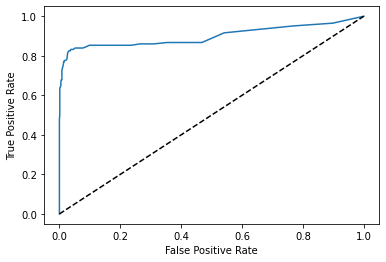

In [ ]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")

### Area under the curve

In [ ]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.8990175518763617


### F1 score

In [ ]:
# Print the F1 score
print(f1_score(y_test, y_pred))

0.804780876494024


## Model Tuning

### Tuning the number of features

In [ ]:
# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}


### Randomized search

In [ ]:
# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist)

# Fit the model
random_search.fit(X, y)

# Print best parameters
print(random_search.best_params_)

C:\Users\Toluwee\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}


### Visualizing feature importances

In [ ]:
# Instantiate the classifier
clf = RandomForestClassifier(bootstrap=True, criterion='entropy', max_features='log2')

# Fit to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2')

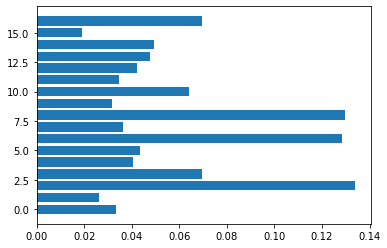

In [ ]:
# Calculate feature importances
importances = clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

### Improving the plot

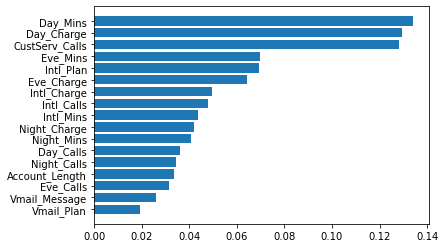

In [ ]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       857
           1       0.94      0.71      0.80       143

    accuracy                           0.95      1000
   macro avg       0.94      0.85      0.89      1000
weighted avg       0.95      0.95      0.95      1000

